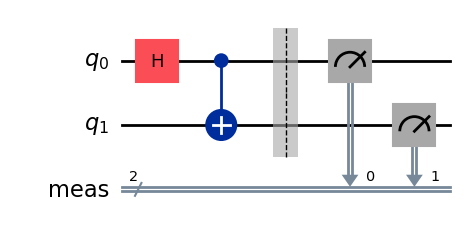

In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2 as Sampler

# You'll need to specify the credentials when initializing QiskitRuntimeService.
# The backend is needed for the later transpile step.
service = QiskitRuntimeService()
backend = service.backend("ibm_rensselaer")

# Create a bell state
qc = QuantumCircuit(2)
qc.h(0)
#qc.h(1)
qc.cx(0,1)
qc.measure_all()

# Draw circuit.
qc.draw("mpl")


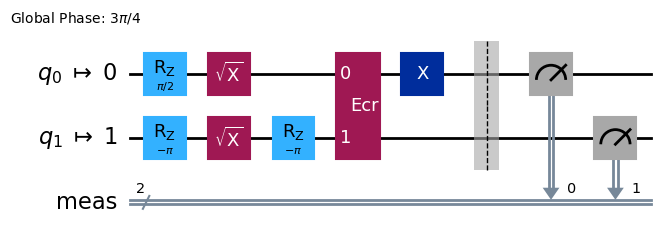

In [2]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)

# Draw the transpiled circuit
isa_circuit.draw("mpl", idle_wires=False)


In [3]:
# Run the transpiled circuit 
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
print(f"job id: {job.job_id()}")

result = job.result()
print(result)



job id: d1i1mdf056bc7398797g
PrimitiveResult([SamplerPubResult(data=DataBin(meas=BitArray(<shape=(), num_shots=4096, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-07-01 17:30:30', stop='2025-07-01 17:30:33', size=4096>)])}, 'version': 2})


Counts for the meas output register: {'11': 2069, '00': 1965, '01': 40, '10': 22}


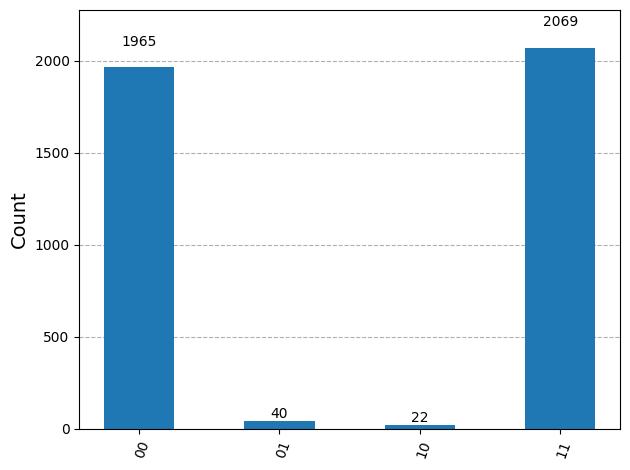

In [4]:
# Get results from Databin
pub_result = result[0]
counts = pub_result.data.meas.get_counts()
print(f"Counts for the meas output register: {counts}")

# Plot results
from qiskit.visualization import plot_histogram
plot_histogram(counts)


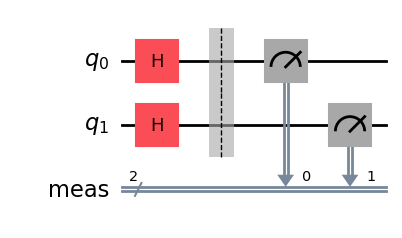

In [5]:
# Put non-entabled qubits into superposition
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.h(1)
qc2.measure_all()

# Draw circuit.
qc2.draw("mpl")


job id: d1i1msna85qs739nos6g
Counts for the meas output register: {'00': 995, '11': 1014, '01': 1043, '10': 1044}


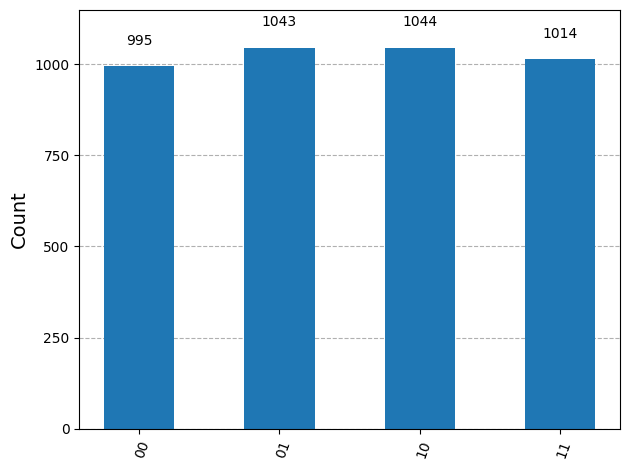

In [6]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc2)
sampler = Sampler(backend)
job = sampler.run([isa_circuit])
print(f"job id: {job.job_id()}")

result = job.result()

pub_result = result[0]
counts = pub_result.data.meas.get_counts()
print(f"Counts for the meas output register: {counts}")

# Plot results
from qiskit.visualization import plot_histogram
plot_histogram(counts)
